Creating the equivalent plots as CellChat for stlearn, in order to do a
side-by-side comparison, which if considered in conjunction with the
colocalisation results & the spatial plots of location of the interactions,
should show how stlearn can reduce the false-positive-rate by taking into
account spatial information. (Plots the GPC3_IGF1R results for main figure).

INPUT:  
 * /Volumes/GML001-Q1851/Brad/breast_bgPerLR_lrsubset_spotsubset_noBgs.h5ad
 * data/breast/label_transfer_bc.csv

OUTPUT: 
 * plots/X1_method_comp/stlearn_breast_*
 * /Volumes/GML001-Q1851/Brad/breast_LR&CCIResults.h5ad
 
## Environment setup & load test data

In [1]:
#TODO: NOTE must be run in the base directory: stlearn_reproduce_results/
work_dir = '/Users/uqbbalde/Desktop/Uni_Studies/projects/stlearn_manuscript/Main_figure_6_CCI_with_Sup/'
gml_rdm_path = '/Volumes/GML001-Q1851/'
data_dir = gml_rdm_path+'Brad/'
data_dir2 = 'data/breast/'

import os, sys
os.chdir(work_dir)

import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import stlearn as st

import stlearn.plotting.cci_plot as cci_plot

import scripts.utils.visualisation.helpers as vhs
import scripts.utils.visualisation.quick_plots as qpl
qpl.setUp()

mode = '' # 'abs_' is discrete spot labels, '' is deconvolution.
data_set = 'breast'
out_plots1 = 'plots/X1_method_comp/'
out_plots = 'plots/X1_method_comp/stlearn_breast_spatial_'

save_output = False

## Loading data, adding label transfer, & calculate cell type interactions !

In [ ]:
# TODO can skip the next section & load directly the output in latter section.
# Loading the data #
data = sc.read_h5ad(data_dir+
                    f'breast_bgPerLR_lrsubset_spotsubset_noBgs.h5ad')
if 'spot_neighbours' in data.uns: # Changed where this was stored recently
    data.obsm['spot_neighbours'] = data.uns['spot_neighbours']

# Adding the label transfer information #
spot_mixtures = pd.read_csv(data_dir2+'label_transfer_bc.csv',
                                                          index_col=0, sep='\t')
labels = spot_mixtures.loc[:,'predicted.id'].values.astype(str)
spot_mixtures = spot_mixtures.drop(['predicted.id','prediction.score.max'],
                                                                         axis=1)
spot_mixtures.columns = [col.replace('prediction.score.', '')
                         for col in spot_mixtures.columns]
data.obs['cell_type'] = labels

data.uns['cell_type'] = spot_mixtures

# Setting colors to be equivalent to cellchat colors #
colors = {'Bcell': '3FA239', 'Tcell': '469ED7', 'basal_like_1': 'D90C19',
          'basal_like_2': '246AA9', 'endothelial': '874293',
          'luminal_ar': 'E37C1A', 'macrophage': 'E46BA5',
          'mesenchymal': 'AD8ABE', 'stroma': '94431E'}
label_set = list(data.obs['cell_type'].cat.categories)
label_colors = ['#'+colors[label] for label in label_set]
data.uns['cell_type_colors'] = label_colors

# Plotting #
sc.pl.spatial(data, color='cell_type', show=False)
vhs.dealWithPlot(True, True, True, out_plots1,
                 'breast_celltypes_spatial.pdf', 300)

# Counting the LR interactions per cell type #
st.tl.cci.run_cci(data, 'cell_type', min_spots=3,
                  spot_mixtures=True, n_perms=1000)

# Writing this out #
# The original #
#data.write_h5ad(data_dir+'breast_LR&CCIResults.h5ad', compression='gzip')

# Reproduction #
if save_output:
    data.write_h5ad(data_dir+'breast_LR&CCIResults_reproduce.h5ad',
                                                             compression='gzip')

## Creating the lr result plots for LRs of interest

In [2]:
# Loading the data #
data = sc.read_h5ad(data_dir+'breast_LR&CCIResults.h5ad')

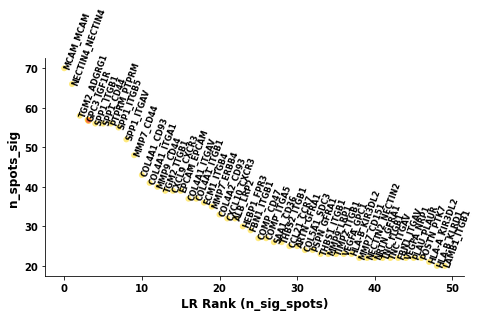

In [3]:
# Visualising the ranked LRs #
lrs = ['GPC3_IGF1R']
st.pl.lr_summary(data, highlight_lrs=lrs)

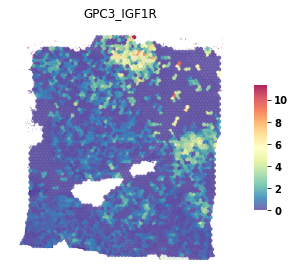

/Users/uqbbalde/Desktop/Uni_Studies/myPython/stlearn_latest/stLearn/stlearn/plotting/classes.py:185: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, aspect=10, shrink=0.5, cmap=self.cmap,


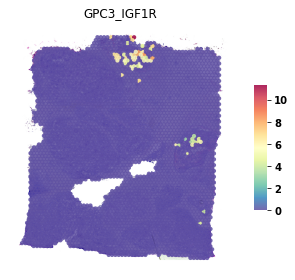

In [5]:
# Visualising spatial scores #
size = 18
a = .85
for best_lr in lrs:
    show = True
    st.pl.lr_result_plot(data, use_result='lr_scores', use_lr=best_lr,
                         size=size, cell_alpha=a)
    vhs.dealWithPlot(True, show, True, out_plots,
                     f'{best_lr}_lrscores.pdf', 300)

    st.pl.lr_result_plot(data, use_result='lr_sig_scores', use_lr=best_lr,
                         size=size, cell_alpha=a)
    vhs.dealWithPlot(True, show, True, out_plots,
                     f'{best_lr}_lr-sig-scores.pdf', 300)

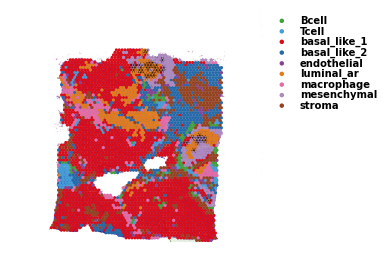

In [6]:
###### Just for 'GPC3_IGF1R' adding the arrows ######
best_lr = 'GPC3_IGF1R'
cci_plot.lr_plot(data, best_lr, outer_size_prop=1, outer_mode=None,
              pt_scale=40, use_label='cell_type', show_arrows=True,
              show_image=True, sig_spots=False, sig_cci=True,
                 arrow_head_width=4,
                 arrow_width=1
                 )
vhs.dealWithPlot(True, True, True, out_plots,
                 f'{best_lr}_arrow-cell-types.pdf', 300)

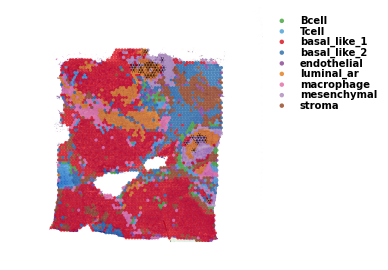

In [7]:
#### Another version with a lower alpha to see structure ######
best_lr = 'GPC3_IGF1R'
cci_plot.lr_plot(data, best_lr, outer_size_prop=1, outer_mode=None,
              pt_scale=40, use_label='cell_type', show_arrows=True,
              show_image=True, sig_spots=False, sig_cci=True,
                 arrow_head_width=4,
                 arrow_width=1, cell_alpha=.8
                 )
vhs.dealWithPlot(True, True, True, out_plots,
                 f'{best_lr}_see-through_arrow-cell-types.pdf', 300)

## NOTE: will need to open the pdfs of the two above plots and zoom in to see the interactions. This can be more easily visualised in stlearn interactive.

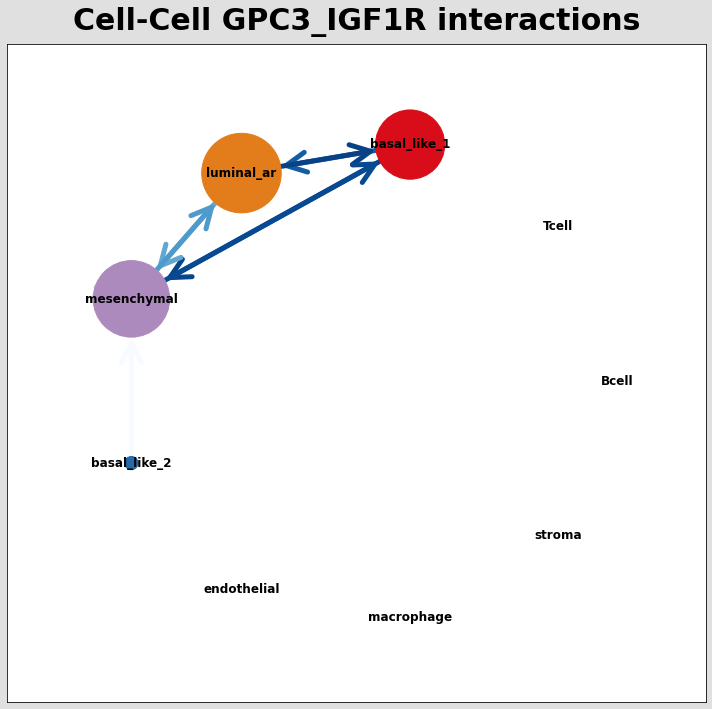

In [9]:
### Visualising the network diagram ###
cci_plot.ccinet_plot(data, 'cell_type', best_lr)

### NOTE: in the paper the above visualisation is done in R via CellChat.